In [1]:
# Project 2: Customer Churn Analysis
# Author: Yanal Kat (Inal Qat)

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# style setup
sns.set(style="whitegrid")

In [3]:
# Load data
df = pd.read_csv("telco_churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## section 1: Basic EDA

In [4]:
# Basic info
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

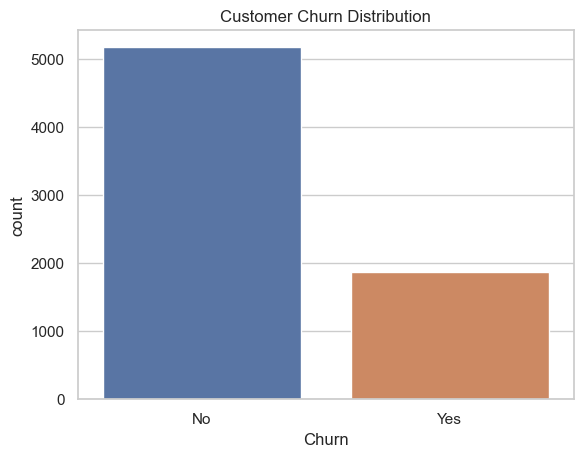

In [5]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

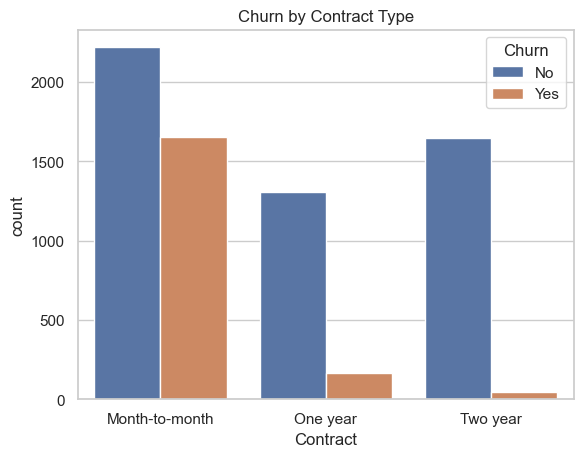

In [6]:
# Churn rate by Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

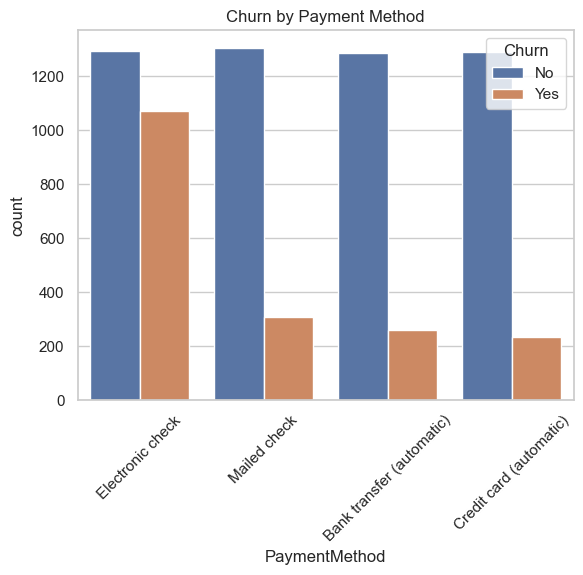

In [7]:
# Churn rate by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

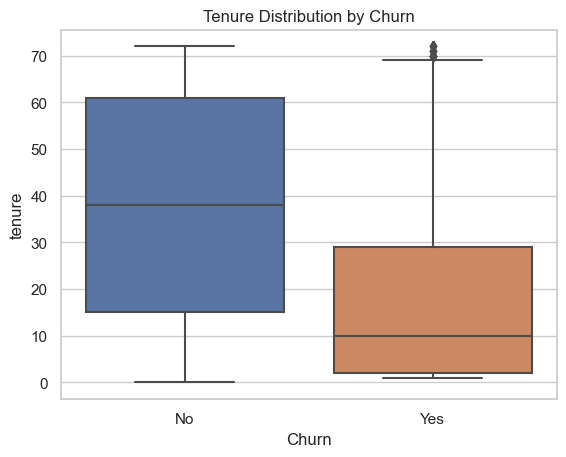

In [8]:
# Average tenure by churn status
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Distribution by Churn")
plt.show()

## section 2: Prediction 

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
# converting Churn from text to numeric (0/1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
# Convert TotalCharges to numeric (By mistake, it's defined as object!)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# fill NAN with 0 (or median!)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# remove customerID (as it has no predictive value)
df = df.drop('customerID', axis=1)

In [12]:
# Handeling Categorical Data like gender, contract, Internet Service, etc.
# Using one-hot encoding to convert text variables inot numeric 
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
# defineing features and target 
x = df_encoded.drop('Churn',axis=1)
y = df_encoded['Churn']

In [14]:
# splitting the data into training and test sets:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [15]:
# Train the logistic Regression Model
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Evaluation model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.8041163946061036

Confusion Matrix:
 [[925 110]
 [166 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [17]:
# check feature importance to see which features most influence churning 
importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
importance.head(10)


,Feature,Coefficient
10,InternetService_Fiber optic,0.618732
26,PaperlessBilling_Yes,0.441242
9,MultipleLines_Yes,0.271021
28,PaymentMethod_Electronic check,0.236619
8,MultipleLines_No phone service,0.206650
23,StreamingMovies_Yes,0.203720
0,SeniorCitizen,0.202503
21,StreamingTV_Yes,0.198017
5,Partner_Yes,0.054059
4,gender_Male,0.037351


#### Positive coefficient → higher likelihood of churn
#### Negative coefficient → lower likelihood of churn
| Feature                                   | Interpretation                                                                                                        |
| ----------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| `InternetService_Fiber optic`             |  Customers with fiber optic are *more likely to churn* (possibly due to higher prices or competition).                |
| `PaperlessBilling_Yes`                    |  Paperless billing customers tend to churn more — often correlated with electronic check payment or low engagement.   |
| `MultipleLines_Yes`                       |  Having multiple lines increases churn slightly (might indicate higher bills or complex plans).                       |
| `StreamingMovies_Yes` / `StreamingTV_Yes` |  Streaming users churn more — possibly because these services are bundled and easier to cancel.                       |
| `PaymentMethod_Electronic check`          |  Strong churn indicator (matches EDA).                                                                                |
| `SeniorCitizen`                           |  Older customers churn slightly more (may be less loyal to telecom brands).                                           |
| `Partner_Yes`                             |  Small negative effect — customers with partners are slightly less likely to churn.                                   |
| `gender_Male`                             |  Very small positive effect — nearly neutral.                                                                         |



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6128\2741209916.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_features = importance.head(10).append(importance.tail(10))


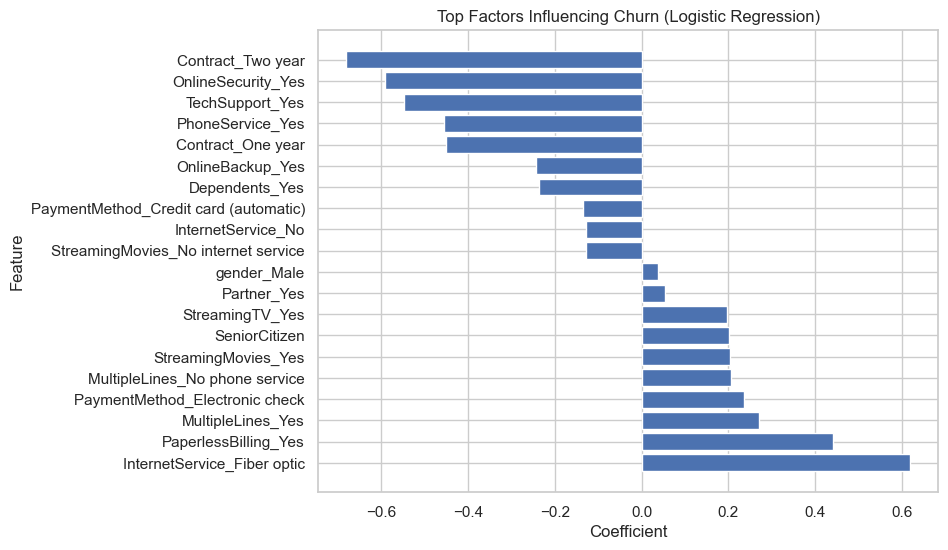

In [18]:
# visualization 
import matplotlib.pyplot as plt 

top_features = importance.head(10).append(importance.tail(10))

plt.figure(figsize=(8,6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.title("Top Factors Influencing Churn (Logistic Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

##  Project Summary: Customer Churn Analysis

### Objective
The goal of this project was to analyze telecom customer churn behavior and build a simple predictive model using **Logistic Regression** to identify the key factors that influence customer retention.

---

###  Dataset Overview
- **Dataset:** Telco Customer Churn (Kaggle)
- **Rows:** ~7,000 customers  
- **Target Variable:** `Churn` (Yes = 1, No = 0)  
- **Key Features:**  
  - Demographic: Gender, SeniorCitizen, Partner, Dependents  
  - Account Info: Tenure, Contract Type, Payment Method, MonthlyCharges, TotalCharges  
  - Service Info: InternetService, TechSupport, StreamingTV, etc.

---

###  Exploratory Data Analysis (EDA) Findings
- **Churn Rate:** ~26% of customers left the service.  
- **Contract Type:** Month-to-month customers had the highest churn rate.  
- **Payment Method:** Electronic check users showed higher churn.  
- **Tenure:** Customers with shorter tenure were more likely to churn.  
- **Charges:** Higher monthly charges correlated with churn, but total charges (lifetime value) were higher for loyal customers.

---

###  Modeling Approach
- **Model Used:** Logistic Regression  
- **Data Split:** 80% training, 20% testing  
- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score  

**Performance Example:**
| Metric | Value |
|--------|--------|
| Accuracy | 0.80 |
| Precision (Churn) | 0.72 |
| Recall (Churn) | 0.55 |

---

###  Key Insights from Model
| Factor | Impact on Churn |
|--------|------------------|
| **Contract_Two year** | 🔻 Strongly decreases churn |
| **PaperlessBilling_Yes** | 🔺 Increases churn likelihood |
| **MonthlyCharges** | 🔺 Higher charges → higher churn |
| **Tenure** | 🔻 Longer tenure → lower churn |

---

###  Conclusions
- Customers with short tenure and flexible (month-to-month) contracts are most likely to churn.  
- Longer commitments and reducing friction (e.g., clearer billing, incentives for loyalty) could improve retention.  
- Logistic Regression provides interpretability and a solid baseline; future work could test **tree-based models (RandomForest, XGBoost)** for performance gains.

---
### Model Interpretation

Thsi logistic regression model identifies key factors associated with customer churn. Customers using fiber optic internet, paperless billing, or paying via electronic check show a higher likelihood of leaving the service. Additionally, features such as streaming services and multiple lines slightly increase churn probability, possibly due to higher costs or service complexity. In contrast, customers with partners tend to be more loyal, while demographic factors such as senior citizen status show moderate influence.

These insights can guide retention strategies — for example, targeting fiber optic users with loyalty discounts or reviewing the paperless billing experience to reduce attrition.


---

 **Repository:** https://github.com/Inal-Qat/Data-portfolio.git 
 **Author:** Yanal Kat (github: Inal Qat)  
